# WP2.5 - Short circuit with grounding

This Notebook shows exemplary tests that are implemented in the sce_test/test_sce.py file in test_wp25_trafo_grounding and test_wp25_grounding_bank.

Therefore it must be run in an environment where the pandapower test folders can be found by the jupyter server's python environment. This can be done by checking out the git branche sce in pandapower and locally initializing the repository by using `pip install -e .`.

Further information on running short-circuit calculations in pandapower can be found in the [documentation on shortcircuit](https://pandapower.readthedocs.io/en/latest/shortcircuit/run.html) and the [shortcircuit tutorial](https://github.com/e2nIEE/pandapower/blob/sce/tutorials/shortcircuit/shortcircuit.ipynb).


In [36]:
import os
from pandapower import pp_dir
from pandapower.plotting import simple_plot, create_generic_coordinates, set_line_geodata_from_bus_geodata
from pandapower.test.shortcircuit.sce_tests.functions_tests import load_test_case, load_test_case_data, run_test_cases, compare_results
import pandapower as pp
from pandapower.file_io import from_json
from pandapower.shortcircuit.calc_sc import calc_sc

testfiles_path = os.path.join(pp_dir, 'test', 'shortcircuit', 'sce_tests')

def plot(net):
    create_generic_coordinates(net, overwrite=True)
    set_line_geodata_from_bus_geodata(net, overwrite=True)

    simple_plot(
        net,
        line_width=5.,
        plot_loads=True, plot_gens=True, plot_sgens=True,
        load_size=3., gen_size=3., sgen_size=3., ext_grid_size=1.5
    )

## Test Case 2: Five bus radial grid with grounding type impedance

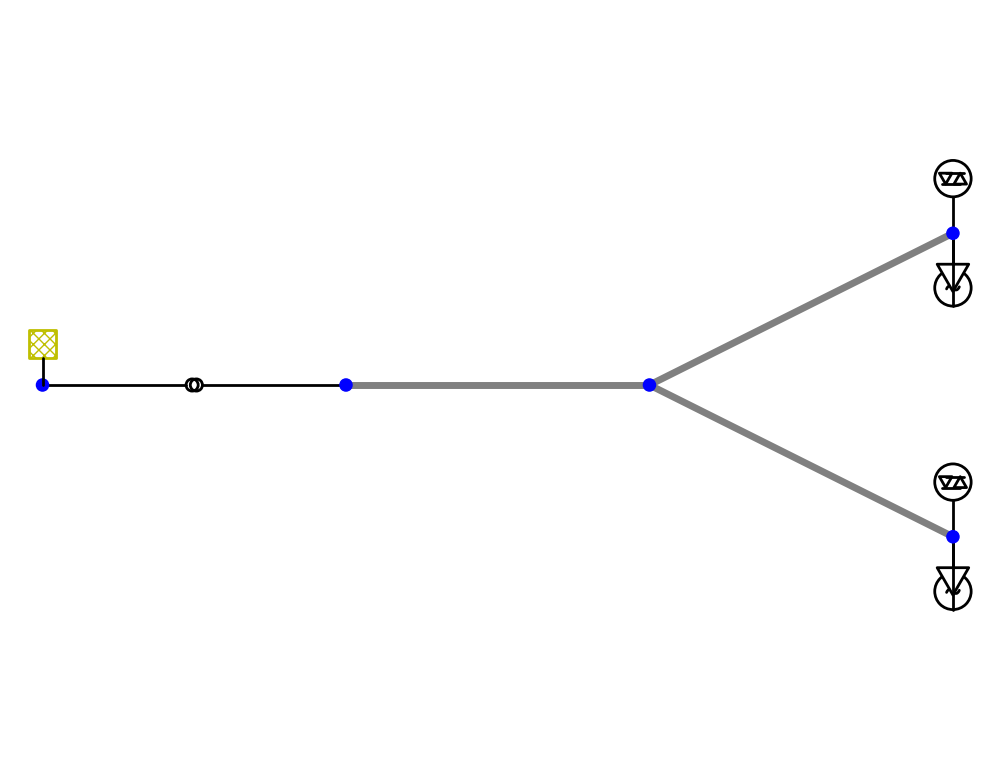

In [37]:
net_name = "2_five_bus_radial_grid"

fault = "LG"
case = "max"
fault_values = (0.0, 0.0)
lv_tol_percents = 10
vector_group = 'Dyn'
fault_location_bus = 3
is_branch_test = True
grounding_type = "impedance"

bus_or_branch = "branch" if is_branch_test else "bus"

net, dataframes = load_test_case_data(net_name, fault_location_bus, vector_group, grounding_type=grounding_type)

plot(net)

With the network and expected results loaded, we now can run the test to receive the dataframes and the columns that should be compared.

Below is the list of columns that will be compared.

In [38]:
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes[bus_or_branch], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['ikss_a_from_ka', 'ikss_a_from_degree', 'ikss_a_to_ka',
       'ikss_a_to_degree', 'p_a_from_mw', 'q_a_from_mvar', 'p_a_to_mw',
       'q_a_to_mvar', 'vm_a_from_pu', 'va_a_from_degree', 'vm_a_to_pu',
       'va_a_to_degree', 'ikss_b_from_ka', 'ikss_b_from_degree',
       'ikss_b_to_ka', 'ikss_b_to_degree', 'p_b_from_mw', 'q_b_from_mvar',
       'p_b_to_mw', 'q_b_to_mvar', 'vm_b_from_pu', 'va_b_from_degree',
       'vm_b_to_pu', 'va_b_to_degree', 'ikss_c_from_ka', 'ikss_c_from_degree',
       'ikss_c_to_ka', 'ikss_c_to_degree', 'p_c_from_mw', 'q_c_from_mvar',
       'p_c_to_mw', 'q_c_to_mvar', 'vm_c_from_pu', 'va_c_from_degree',
       'vm_c_to_pu', 'va_c_to_degree'],
      dtype='object')

In [39]:
net_df[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,1.068533,-45.202609,1.066069,134.939762,3.607596,2.007709,-1.787385,-1.004629,0.334618,-16.105681,...,0.008100,85.359793,-0.124698,-0.167478,0.088912,0.125578,1.543105,139.434330,1.645061,140.060391
1,1.060835,135.272833,1.063503,-44.901652,0.000000,0.000000,1.785851,0.997272,0.000000,0.000000,...,0.004193,-95.291658,0.000000,0.000000,-0.045287,-0.065530,1.744931,140.661252,1.645061,140.060391
2,0.000000,0.000000,0.003907,-93.941072,0.000000,0.000000,0.001534,0.007357,0.166193,-15.527798,...,0.003907,-93.941072,0.000000,0.000000,-0.043626,-0.060049,1.645630,140.047861,1.645061,140.060391


In [40]:
pf_results[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,1.068533,-45.202609,1.066069,134.939763,3.607596e+00,2.007709e+00,-1.787385,-1.004629,0.334618,-16.105681,...,0.008100,85.359788,-1.246981e-01,-1.674784e-01,0.088912,0.125578,1.543105,139.434330,1.645061,140.060391
1,1.060835,135.272833,1.063503,-44.901652,1.171450e-11,-2.304671e-11,1.785851,0.997272,0.000000,0.000000,...,0.004193,-95.291662,-4.578959e-09,2.483276e-09,-0.045287,-0.065530,1.744931,140.661252,1.645061,140.060391
2,0.000000,0.000000,0.003907,-93.941076,5.445705e-10,-1.794456e-10,0.001534,0.007357,0.166193,-15.527798,...,0.003907,-93.941075,-3.694457e-09,2.275354e-09,-0.043626,-0.060049,1.645630,140.047861,1.645061,140.060391


These are all the test results that were exported from PowerFactory. Depending on the parameter combination, the corresponding dataframe is selected.

In [41]:
dataframes[bus_or_branch][f"{fault}_{case}_{lv_tol_percents}"]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,Line_0,1.068533,1.068533,-45.202609,1.066069,134.939763,3.607596e+00,2.007709e+00,-1.787385,-1.004629,...,0.008100,85.359788,-1.246981e-01,-1.674784e-01,0.088912,0.125578,1.543105,139.434330,1.645061,140.060391
1,Line_1,1.063503,1.060835,135.272833,1.063503,-44.901652,1.171450e-11,-2.304671e-11,1.785851,0.997272,...,0.004193,-95.291662,-4.578959e-09,2.483276e-09,-0.045287,-0.065530,1.744931,140.661252,1.645061,140.060391
2,Line_2,0.003907,0.000000,0.000000,0.003907,-93.941076,5.445705e-10,-1.794456e-10,0.001534,0.007357,...,0.003907,-93.941075,-3.694457e-09,2.275354e-09,-0.043626,-0.060049,1.645630,140.047861,1.645061,140.060391


As you can see the results are matching and the comparison function will pass and not throw any errors.

In [42]:
compare_results(columns_to_check, net_df, pf_results)

### as bus test with grounding type resistance

Similarly tests can be run for bus faults and other grounding type

In [43]:
grounding_type = "resistance"
is_branch_test = False
bus_or_branch = "branch" if is_branch_test else "bus"

net, dataframes = load_test_case_data(net_name, fault_location_bus, vector_group, grounding_type=grounding_type)

columns_to_check, net_df, pf_results = run_test_cases(net, dataframes[bus_or_branch], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['ikss_ka', 'skss_mw', 'rk0_ohm', 'xk0_ohm', 'rk1_ohm', 'xk1_ohm',
       'rk2_ohm', 'xk2_ohm'],
      dtype='object')

In [44]:
net_df[columns_to_check]

,ikss_ka,skss_mw,rk0_ohm,xk0_ohm,rk1_ohm,xk1_ohm,rk2_ohm,xk2_ohm
3,1.42769,16.485542,22.477669,2.955438,1.147732,3.488439,1.147732,3.488439


In [45]:
pf_results[columns_to_check]

,ikss_ka,skss_mw,rk0_ohm,xk0_ohm,rk1_ohm,xk1_ohm,rk2_ohm,xk2_ohm
3,1.42769,16.485542,22.477669,2.955438,1.147732,3.488439,1.147732,3.488439


In [46]:
dataframes[bus_or_branch][f"{fault}_{case}_{lv_tol_percents}"]

,name,ikss_ka,skss_mw,rk0_ohm,xk0_ohm,rk1_ohm,xk1_ohm,rk2_ohm,xk2_ohm
0,Bus_0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bus_1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bus_2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bus_3,1.42769,16.485542,22.477669,2.955438,1.147732,3.488439,1.147732,3.488439
4,Bus_4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
compare_results(columns_to_check, net_df, pf_results)

# Test Case 3: Five bus meshed grid with grounding type inductance

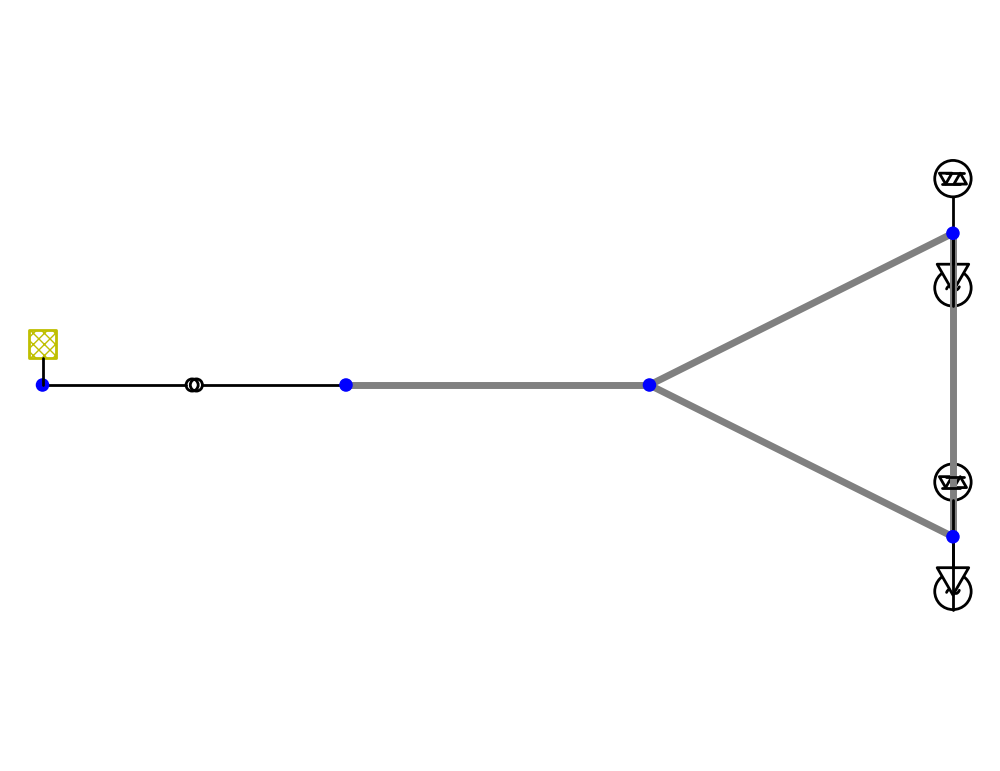

In [48]:
net_name = "3_five_bus_meshed_grid"

fault = "LLG"
case = "min"
fault_values = (5.0, 5.0)
vector_group = 'Yyn'
lv_tol_percents = 6
fault_location_bus = 2
is_branch_test = True
grounding_type = "inductance"

bus_or_branch = "branch" if is_branch_test else "bus"

net, dataframes = load_test_case_data(net_name, fault_location_bus, vector_group, grounding_type=grounding_type)

plot(net)

In [49]:
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes[bus_or_branch], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['ikss_a_from_ka', 'ikss_a_from_degree', 'ikss_a_to_ka',
       'ikss_a_to_degree', 'p_a_from_mw', 'q_a_from_mvar', 'p_a_to_mw',
       'q_a_to_mvar', 'vm_a_from_pu', 'va_a_from_degree', 'vm_a_to_pu',
       'va_a_to_degree', 'ikss_b_from_ka', 'ikss_b_from_degree',
       'ikss_b_to_ka', 'ikss_b_to_degree', 'p_b_from_mw', 'q_b_from_mvar',
       'p_b_to_mw', 'q_b_to_mvar', 'vm_b_from_pu', 'va_b_from_degree',
       'vm_b_to_pu', 'va_b_to_degree', 'ikss_c_from_ka', 'ikss_c_from_degree',
       'ikss_c_to_ka', 'ikss_c_to_degree', 'p_c_from_mw', 'q_c_from_mvar',
       'p_c_to_mw', 'q_c_to_mvar', 'vm_c_from_pu', 'va_c_from_degree',
       'vm_c_to_pu', 'va_c_to_degree'],
      dtype='object')

In [50]:
net_df[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,0.008661,95.411984,0.006523,-85.365568,-0.005435,-0.14061,0.005685,0.106750,1.407033,3.198287,...,1.045899,-137.218107,6.784507,6.516512,-5.475283,-5.421628,0.778016,86.723548,0.638020,87.499775
1,0.001087,-85.423662,0.003262,94.634432,0.000946,0.01780,-0.002843,-0.053375,1.419551,1.532677,...,0.003262,94.634432,-0.007934,0.000990,0.023843,-0.002984,0.636728,87.460237,0.638020,87.499775
2,0.001087,-85.423662,0.003262,94.634432,0.000946,0.01780,-0.002843,-0.053375,1.419551,1.532677,...,0.003262,94.634432,-0.007934,0.000990,0.023843,-0.002984,0.636728,87.460237,0.638020,87.499775
3,0.001087,94.576338,0.001087,94.576338,-0.000946,-0.01780,-0.000946,-0.017800,1.419551,1.532677,...,0.001087,94.576338,0.007934,-0.000990,0.007934,-0.000990,0.636728,87.460237,0.636728,87.460237


In [51]:
pf_results[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,0.008661,95.411981,0.006523,-85.365572,-0.005435,-0.14061,0.005685,0.106750,1.407033,3.198287,...,1.045899,-137.218106,6.784507,6.516512,-5.475283,-5.421628,0.778017,86.723548,0.638020,87.499775
1,0.001087,-85.423669,0.003262,94.634430,0.000946,0.01780,-0.002843,-0.053375,1.419551,1.532677,...,0.003262,94.634429,-0.007934,0.000990,0.023843,-0.002984,0.636728,87.460237,0.638020,87.499775
2,0.001087,-85.423669,0.003262,94.634430,0.000946,0.01780,-0.002843,-0.053375,1.419551,1.532677,...,0.003262,94.634429,-0.007934,0.000990,0.023843,-0.002984,0.636728,87.460237,0.638020,87.499775
3,0.001087,94.576338,0.001087,94.576338,-0.000946,-0.01780,-0.000946,-0.017800,1.419551,1.532677,...,0.001087,94.576338,0.007934,-0.000990,0.007934,-0.000990,0.636728,87.460237,0.636728,87.460237


In [52]:
dataframes[bus_or_branch][f"{fault}_{case}_{lv_tol_percents}"]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,Line_0,3.151001,0.009657,90.946866,0.007273,-89.830686,0.003126,-0.162523,-0.000250,0.123360,...,3.150216,-157.503456,10.141383,7.495389,3.330489e-11,-1.922182e-10,0.346593,59.005241,0.000000,0.000000
1,Line_1,0.003637,0.001212,-89.888784,0.003637,90.169315,-0.000042,0.020569,0.000125,-0.061680,...,0.003637,90.169315,0.000021,0.000004,1.906607e-13,1.198660e-13,0.001522,-78.182428,0.000000,0.000000
2,Line_2,0.003637,0.001212,-89.888784,0.003637,90.169315,-0.000042,0.020569,0.000125,-0.061680,...,0.003637,90.169315,0.000021,0.000004,1.906607e-13,1.198660e-13,0.001522,-78.182428,0.000000,0.000000
3,Line_3,0.001212,0.001212,90.111223,0.001212,90.111223,0.000042,-0.020569,0.000042,-0.020569,...,0.001212,90.111223,-0.000021,-0.000004,-2.085955e-05,-4.322215e-06,0.001522,-78.182428,0.001522,-78.182428


In [53]:
compare_results(columns_to_check, net_df, pf_results)

## with grounding bank and grounding type impedance

In [54]:
grounding_type = "impedance"

net, dataframes = load_test_case_data(net_name, fault_location_bus, vector_group, grounding_type=grounding_type, grounding_bank_idx=[3, 4])
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes[bus_or_branch], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['ikss_a_from_ka', 'ikss_a_from_degree', 'ikss_a_to_ka',
       'ikss_a_to_degree', 'p_a_from_mw', 'q_a_from_mvar', 'p_a_to_mw',
       'q_a_to_mvar', 'vm_a_from_pu', 'va_a_from_degree', 'vm_a_to_pu',
       'va_a_to_degree', 'ikss_b_from_ka', 'ikss_b_from_degree',
       'ikss_b_to_ka', 'ikss_b_to_degree', 'p_b_from_mw', 'q_b_from_mvar',
       'p_b_to_mw', 'q_b_to_mvar', 'vm_b_from_pu', 'va_b_from_degree',
       'vm_b_to_pu', 'va_b_to_degree', 'ikss_c_from_ka', 'ikss_c_from_degree',
       'ikss_c_to_ka', 'ikss_c_to_degree', 'p_c_from_mw', 'q_c_from_mvar',
       'p_c_to_mw', 'q_c_to_mvar', 'vm_c_from_pu', 'va_c_from_degree',
       'vm_c_to_pu', 'va_c_to_degree'],
      dtype='object')

In [55]:
net_df[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,0.308874,-40.806664,0.309300,139.043845,3.270402,2.405924,-3.172727,-2.361951,1.138361,-4.466003,...,0.972055,-133.723007,4.098371,6.713101,-3.150358,-6.153422,0.700169,104.900187,0.615893,109.165976
1,0.155030,138.833250,0.154650,-40.956155,-1.415613,-1.154241,1.586364,1.180975,1.020333,-1.974174,...,0.154650,-40.956155,1.128296,-0.510236,-0.953649,0.547883,0.691736,114.499875,0.615893,109.165976
2,0.155030,138.833250,0.154650,-40.956155,-1.415613,-1.154241,1.586364,1.180975,1.020333,-1.974174,...,0.154650,-40.956155,1.128296,-0.510236,-0.953649,0.547883,0.691736,114.499875,0.615893,109.165976
3,0.000235,93.771781,0.000235,93.771781,-0.000277,-0.002757,-0.000277,-0.002757,1.020333,-1.974174,...,0.000235,93.771781,0.001757,0.000665,0.001757,0.000665,0.691736,114.499875,0.691736,114.499875


In [56]:
pf_results[columns_to_check]

,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,vm_a_from_pu,va_a_from_degree,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,0.308874,-40.806664,0.309300,139.043845,3.270402,2.405924,-3.172727,-2.361951,1.138361,-4.466003,...,0.972055,-133.723006,4.098371,6.713101,-3.150358,-6.153422,0.700169,104.900187,0.615893,109.165976
1,0.155030,138.833249,0.154650,-40.956155,-1.415613,-1.154241,1.586364,1.180975,1.020333,-1.974174,...,0.154650,-40.956155,1.128296,-0.510236,-0.953649,0.547883,0.691736,114.499875,0.615893,109.165976
2,0.155030,138.833249,0.154650,-40.956155,-1.415613,-1.154241,1.586364,1.180975,1.020333,-1.974174,...,0.154650,-40.956155,1.128296,-0.510236,-0.953649,0.547883,0.691736,114.499875,0.615893,109.165976
3,0.000235,93.771781,0.000235,93.771781,-0.000277,-0.002757,-0.000277,-0.002757,1.020333,-1.974174,...,0.000235,93.771781,0.001757,0.000665,0.001757,0.000665,0.691736,114.499875,0.691736,114.499875


In [57]:
dataframes[bus_or_branch][f"{fault}_{case}_{lv_tol_percents}"]

,name,ikss_ka,ikss_a_from_ka,ikss_a_from_degree,ikss_a_to_ka,ikss_a_to_degree,p_a_from_mw,q_a_from_mvar,p_a_to_mw,q_a_to_mvar,...,ikss_c_to_ka,ikss_c_to_degree,p_c_from_mw,q_c_from_mvar,p_c_to_mw,q_c_to_mvar,vm_c_from_pu,va_c_from_degree,vm_c_to_pu,va_c_to_degree
0,Line_0,3.332476,0.708331,-35.346536,0.709308,144.503973,9.673281,5.126930,-9.168919,-4.865659,...,2.932830,-153.985081,8.586193,5.058271,-7.788544e-14,-1.999349e-10,0.294148,56.551991,0.000000,0.00000
1,Line_1,0.355526,0.355526,144.293377,0.354654,-35.496027,-3.691175,-2.269117,4.584459,2.432829,...,0.354654,-35.496027,0.895563,0.186570,-2.124507e-11,1.154059e-11,0.222834,156.061330,0.000000,0.00000
2,Line_2,0.355526,0.355526,144.293377,0.354654,-35.496027,-3.691175,-2.269117,4.584459,2.432829,...,0.354654,-35.496027,0.895563,0.186570,-2.124507e-11,1.154059e-11,0.222834,156.061330,0.000000,0.00000
3,Line_3,0.000539,0.000539,99.231909,0.000539,99.231909,-0.001519,-0.006396,-0.001519,-0.006396,...,0.000539,99.231909,0.000759,0.001162,7.593790e-04,1.161754e-03,0.222834,156.061330,0.222834,156.06133


In [58]:
compare_results(columns_to_check, net_df, pf_results)

# Test Case 4: Twenty bus radial grid with grounding type resistance

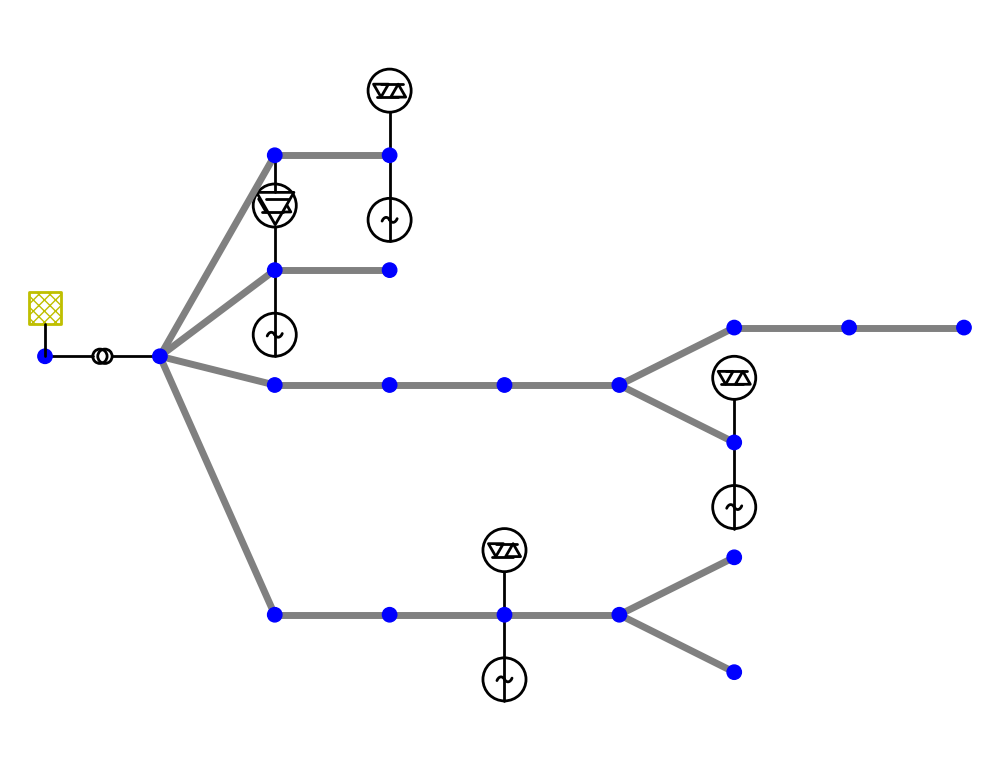

In [59]:
net_name = "4_twenty_bus_radial_grid"

fault = "LLG"
case = "max"
fault_values = (5.0, 5.0)
lv_tol_percents = 6
fault_location_bus = 8
is_branch_test = False
vector_group = "Dyn"
grounding_type = "resistance"

bus_or_branch = "branch" if is_branch_test else "bus"

net, dataframes = load_test_case_data(net_name, fault_location_bus, vector_group, grounding_type=grounding_type, grounding_bank_idx=[4])

plot(net)

In [60]:
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes[bus_or_branch], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['ikss_a_ka', 'skss_a_mw', 'ikss_b_ka', 'skss_b_mw', 'ikss_c_ka',
       'skss_c_mw', 'rk0_ohm', 'xk0_ohm', 'rk1_ohm', 'xk1_ohm', 'rk2_ohm',
       'xk2_ohm'],
      dtype='object')

In [61]:
net_df[columns_to_check]

,ikss_a_ka,skss_a_mw,ikss_b_ka,skss_b_mw,ikss_c_ka,skss_c_mw,rk0_ohm,xk0_ohm,rk1_ohm,xk1_ohm,rk2_ohm,xk2_ohm
8,0.0,0.0,0.034466,0.00796,0.028868,0.006667,10.025005,5.049291,5.041943,5.103206,5.041943,5.103206


In [62]:
pf_results[columns_to_check]

,ikss_a_ka,skss_a_mw,ikss_b_ka,skss_b_mw,ikss_c_ka,skss_c_mw,rk0_ohm,xk0_ohm,rk1_ohm,xk1_ohm,rk2_ohm,xk2_ohm
18,0,0,0.034466,0.00796,0.028868,0.006667,10.024972,5.04929,5.041943,5.103206,5.041943,5.103206


In [63]:
dataframes[bus_or_branch][f"{fault}_{case}_{lv_tol_percents}"]

,name,ikss_a_ka,ikss_b_ka,ikss_c_ka,skss_a_mw,skss_b_mw,skss_c_mw,rk0_ohm,xk0_ohm,rk1_ohm,xk1_ohm,rk2_ohm,xk2_ohm
0,0,0,0.000000,0.000000,0,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,1,0,0.000000,0.000000,0,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,10,0,0.000000,0.000000,0,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,11,0,0.000000,0.000000,0,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,12,0,0.000000,0.000000,0,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,13,0,0.000000,0.000000,0,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,14,0,0.000000,0.000000,0,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,15,0,0.000000,0.000000,0,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,16,0,0.000000,0.000000,0,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,17,0,0.000000,0.000000,0,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [64]:
compare_results(columns_to_check, net_df, pf_results)

## with grounding bank and grounding type resonant

In [65]:
grounding_type = "resonant"

net, dataframes = load_test_case_data(net_name, fault_location_bus, vector_group, grounding_type=grounding_type, grounding_bank_idx=[4])
columns_to_check, net_df, pf_results = run_test_cases(net, dataframes[bus_or_branch], fault, case, fault_values, lv_tol_percents, fault_location_bus, is_branch_test)
columns_to_check

Index(['ikss_a_ka', 'skss_a_mw', 'ikss_b_ka', 'skss_b_mw', 'ikss_c_ka',
       'skss_c_mw', 'rk0_ohm', 'xk0_ohm', 'rk1_ohm', 'xk1_ohm', 'rk2_ohm',
       'xk2_ohm'],
      dtype='object')

In [66]:
net_df[columns_to_check]

,ikss_a_ka,skss_a_mw,ikss_b_ka,skss_b_mw,ikss_c_ka,skss_c_mw,rk0_ohm,xk0_ohm,rk1_ohm,xk1_ohm,rk2_ohm,xk2_ohm
8,0.0,0.0,0.029116,0.006724,0.029431,0.006797,5.02541,799.504293,5.041943,5.103206,5.041943,5.103206


In [67]:
pf_results[columns_to_check]

,ikss_a_ka,skss_a_mw,ikss_b_ka,skss_b_mw,ikss_c_ka,skss_c_mw,rk0_ohm,xk0_ohm,rk1_ohm,xk1_ohm,rk2_ohm,xk2_ohm
18,0,0,0.029116,0.006724,0.029431,0.006797,5.867254,799.503381,5.041943,5.103206,5.041943,5.103206


In [68]:
dataframes[bus_or_branch][f"{fault}_{case}_{lv_tol_percents}"]

,name,ikss_a_ka,ikss_b_ka,ikss_c_ka,skss_a_mw,skss_b_mw,skss_c_mw,rk0_ohm,xk0_ohm,rk1_ohm,xk1_ohm,rk2_ohm,xk2_ohm,3xI0
0,0,0,0.00000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0,0.00000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,10,0,0.00000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,11,0,0.00000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,12,0,0.00000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,13,0,0.00000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,14,0,0.00000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,15,0,0.00000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,16,0,0.00000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,17,0,0.00000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
compare_results(columns_to_check, net_df, pf_results)